# Intro

Ok. As we're warming up to the project, today's exercises is going to ask you to create our own micro-project. It'll be highly structured and hosted on the web-page you created last time. Before we can start on that there's a bit of reading first. 

Thus, today's lecture has two parts:

* More reading on Narrative Data Visualization.
* Creating a micro project based on our work in the class so far.

So let's get started 😀

## Part 1: More on narrative data viz

*Reading*. More on Narrative Visualization. Edward Segel and Jeffrey Heer. [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf), section 4-6.

> *Exercise*: Questions to the text
> 
> * What's the point of Figure 7?
> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).
> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?

## Part 2: A short data story / micro-project

> *Exercise*: Create a short data-story based on the work we've done in class so far. (This exercise is a kind of "micro version" of what we'll be doing in the final project). Follow the directions in the bulleted list below when you create your data-story.

* **Find your own story to tell in the work on analyzing the SF Crime Data that we've done so far** (Week 1 - Week 6). The idea is to choose an insight about crime in SF (perhaps how something changed over the years) and communicate that insight to a general audience reader.
* The web-page should be hosted on your GitHub Pages site (Week 7).
* The format must be the classic *Magazine Genre* presented on a single web-page (see the Segel \& Heer paper for details.
* The story should have a brief introduction to the dataset so new readers from outside the class can understand what's going on.
* Your story should include three visualizations. Not more than three, not less than three (but multi-panel figures are OK). The figures should be one of each of the following types
  - One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4).
  - One map (use techniques from Week 3 and 4)
  - One interactive visualization in Bokeh (Week 6)
* **At a minimum, the Bokeh visualization should contain different data** than the exercise we did for Week 6 (it's a plus if it's a new type of viz altogether). 
* The two other visualization may be repetitions of figures created during the previous lectures, or they may be new.
* Make the figures nice. Specifically:
  - Aim to make the figures visually consistent (color, fonts, etc)
  - Follow the recommendations from my video on nice figures (Week 2)
* In terms of the amount of text, I envision something like 500-1500 words (including figure captions).
* It is a plus if you can back up some of your findings with external sources, such as news stories from the area, looking up which building is located at some set of `lat,lon` coordinates, or similar. (So when you see something happening at some time/place in the data, see if you can understand it more deeply by investigating outside the dataset.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_before_2018 = pd.read_csv('../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_before_2018['Date'] = pd.to_datetime(df_before_2018['Date'])
df_before_2018['Year'] = df_before_2018['Date'].dt.year
df_before_2018 = df_before_2018.loc[df_before_2018['Year'] != 2018]

In [5]:
df_before_2018.columns.tolist()

['PdId',
 'IncidntNum',
 'Incident Code',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'location',
 'SF Find Neighborhoods 2 2',
 'Current Police Districts 2 2',
 'Current Supervisor Districts 2 2',
 'Analysis Neighborhoods 2 2',
 'DELETE - Fire Prevention Districts 2 2',
 'DELETE - Police Districts 2 2',
 'DELETE - Supervisor Districts 2 2',
 'DELETE - Zip Codes 2 2',
 'DELETE - Neighborhoods 2 2',
 'DELETE - 2017 Fix It Zones 2 2',
 'Civic Center Harm Reduction Project Boundary 2 2',
 'Fix It Zones as of 2017-11-06  2 2',
 'DELETE - HSOC Zones 2 2',
 'Fix It Zones as of 2018-02-07 2 2',
 'CBD, BID and GBD Boundaries as of 2017 2 2',
 'Areas of Vulnerability, 2016 2 2',
 'Central Market/Tenderloin Boundary 2 2',
 'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
 'HSOC Zones as of 2018-06-05 2 2',
 'OWED Public Spaces 2 2',
 'Neighborhoods 2',
 'Year']

In [7]:
df_after_2018 = pd.read_csv('../Police_Department_Incident_Reports__2018_to_Present.csv')

In [8]:
df_after_2018.columns.tolist()

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Filed Online',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Intersection',
 'CNN',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Supervisor District 2012',
 'Latitude',
 'Longitude',
 'Point',
 'Neighborhoods',
 'ESNCAG - Boundary File',
 'Central Market/Tenderloin Boundary Polygon - Updated',
 'Civic Center Harm Reduction Project Boundary',
 'HSOC Zones as of 2018-06-05',
 'Invest In Neighborhoods (IIN) Areas',
 'Current Supervisor Districts',
 'Current Police Districts']

In [9]:
category1 = df_before_2018['Category'].unique().tolist()
category2 = df_after_2018['Incident Category'].unique().tolist()

category1

['ROBBERY',
 'VEHICLE THEFT',
 'ARSON',
 'ASSAULT',
 'TRESPASS',
 'BURGLARY',
 'LARCENY/THEFT',
 'WARRANTS',
 'OTHER OFFENSES',
 'DRUG/NARCOTIC',
 'SUSPICIOUS OCC',
 'LIQUOR LAWS',
 'VANDALISM',
 'WEAPON LAWS',
 'NON-CRIMINAL',
 'MISSING PERSON',
 'FRAUD',
 'SEX OFFENSES, FORCIBLE',
 'SECONDARY CODES',
 'DISORDERLY CONDUCT',
 'RECOVERED VEHICLE',
 'KIDNAPPING',
 'FORGERY/COUNTERFEITING',
 'PROSTITUTION',
 'DRUNKENNESS',
 'BAD CHECKS',
 'DRIVING UNDER THE INFLUENCE',
 'LOITERING',
 'STOLEN PROPERTY',
 'SUICIDE',
 'BRIBERY',
 'EXTORTION',
 'EMBEZZLEMENT',
 'GAMBLING',
 'PORNOGRAPHY/OBSCENE MAT',
 'SEX OFFENSES, NON FORCIBLE',
 'TREA']

In [10]:
category2 = [ele.upper() if isinstance(ele, str) else ele for ele in category2]
category2

['RECOVERED VEHICLE',
 'LARCENY THEFT',
 'ASSAULT',
 'LOST PROPERTY',
 'DRUG VIOLATION',
 'MALICIOUS MISCHIEF',
 'DRUG OFFENSE',
 'NON-CRIMINAL',
 'FRAUD',
 'WARRANT',
 'OTHER OFFENSES',
 'ROBBERY',
 'CASE CLOSURE',
 'OTHER MISCELLANEOUS',
 'STOLEN PROPERTY',
 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 'OTHER',
 'MOTOR VEHICLE THEFT',
 'TRAFFIC COLLISION',
 'SUSPICIOUS OCC',
 'MISSING PERSON',
 'DISORDERLY CONDUCT',
 'WEAPONS CARRYING ETC',
 'RAPE',
 'BURGLARY',
 'FIRE REPORT',
 'ARSON',
 'VANDALISM',
 'SUICIDE',
 'TRAFFIC VIOLATION ARREST',
 'COURTESY REPORT',
 'FORGERY AND COUNTERFEITING',
 'MISCELLANEOUS INVESTIGATION',
 'VEHICLE IMPOUNDED',
 nan,
 'CIVIL SIDEWALKS',
 'SEX OFFENSE',
 'WEAPONS OFFENSE',
 'SUSPICIOUS',
 'VEHICLE MISPLACED',
 'PROSTITUTION',
 'EMBEZZLEMENT',
 'LIQUOR LAWS',
 'MOTOR VEHICLE THEFT?',
 'HOMICIDE',
 'GAMBLING',
 'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS',
 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 'WEAPONS OFFENCE',
 'HUMAN TRAFFICKING (B), INVOLUNTAR

In [11]:
c = list(set(category1).intersection(set(category2)))
c

['FRAUD',
 'OTHER OFFENSES',
 'ROBBERY',
 'ASSAULT',
 'SUSPICIOUS OCC',
 'MISSING PERSON',
 'STOLEN PROPERTY',
 'NON-CRIMINAL',
 'BURGLARY',
 'VANDALISM',
 'DISORDERLY CONDUCT',
 'EMBEZZLEMENT',
 'ARSON',
 'GAMBLING',
 'LIQUOR LAWS',
 'PROSTITUTION',
 'RECOVERED VEHICLE',
 'SUICIDE']

In [12]:
df_after_2018.loc[df_after_2018['Incident Category']=='Robbery']

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
146,2020/07/08 10:15:00 AM,2020/07/08,10:15,2020,Wednesday,2020/07/08 10:15:00 AM,94191203081,941912,200315724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,2021/12/25 10:29:00 AM,2021/12/25,10:29,2021,Saturday,2021/12/25 10:29:00 AM,110595003081,1105950,210742214,213151044.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,2021/04/11 12:00:00 AM,2021/04/11,00:00,2021,Sunday,2021/04/11 12:00:00 AM,102085303071,1020853,200640537,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,2021/08/04 10:45:00 AM,2021/08/04,10:45,2021,Wednesday,2021/08/04 10:45:00 AM,105692803071,1056928,210416566,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,2021/09/14 01:38:00 PM,2021/09/14,13:38,2021,Tuesday,2021/09/14 01:38:00 PM,107044103023,1070441,210563593,212572013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708632,2023/03/21 12:30:00 PM,2023/03/21,12:30,2023,Tuesday,2023/03/22 08:26:00 PM,125690803074,1256908,230202890,230813309.0,...,-122.433357,POINT (-122.43335745116335 37.72658820102466),94.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0
708675,2023/03/22 06:41:00 PM,2023/03/22,18:41,2023,Wednesday,2023/03/22 06:43:00 PM,125687903011,1256879,230202599,230812995.0,...,-122.378951,POINT (-122.37895131354931 37.72530441408205),78.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
708736,2023/03/17 08:30:00 PM,2023/03/17,20:30,2023,Friday,2023/03/21 05:07:00 PM,125659603071,1256596,230199946,230802686.0,...,-122.474985,POINT (-122.47498519501038 37.763655789917316),109.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0
708744,2023/03/16 09:00:00 PM,2023/03/16,21:00,2023,Thursday,2023/03/22 10:20:00 AM,125678503071,1256785,230201381,230810933.0,...,-122.410066,POINT (-122.41006640763854 37.75273902362426),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0


In [13]:
df_before_2018.loc[df_before_2018['Category'] == 'ROBBERY']

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
17,4082921803021,40829218,3021,ROBBERY,ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN,Wednesday,2004-07-21,07:30,TENDERLOIN,NONE,...,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0,2004
59,4122832203014,41228322,3014,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Wednesday,2004-10-27,01:00,INGLESIDE,NONE,...,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,58.0,2004
77,3122407303074,31224073,3074,ROBBERY,"ROBBERY, BODILY FORCE",Friday,2003-10-17,19:56,RICHMOND,"ARREST, BOOKED",...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,2003
94,6016358503064,60163585,3064,ROBBERY,ROBBERY OF A BANK WITH BODILY FORCE,Sunday,2006-02-12,11:07,MISSION,NONE,...,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,53.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129337,17030204103011,170302041,3011,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Thursday,2017-04-13,06:00,BAYVIEW,NONE,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,91.0,2017
2129338,17062642103071,170626421,3071,ROBBERY,"ROBBERY, ARMED WITH A GUN",Tuesday,2017-08-01,22:42,NORTHERN,NONE,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,100.0,2017
2129352,17076160703071,170761607,3071,ROBBERY,"ROBBERY, ARMED WITH A GUN",Monday,2017-09-18,00:43,MISSION,NONE,...,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0,2017
2129357,17034778003401,170347780,3401,ROBBERY,"SHOPLIFTING, FORCE AGAINST AGENT",Friday,2017-04-28,10:24,TARAVAL,NONE,...,NaN,24.0,NaN,1.0,NaN,NaN,NaN,NaN,40.0,2017


## Timeseries: bar chart + some calendar plots

In [14]:
focuscrimes = [ 'ASSAULT', 'ROBBERY']

In [15]:
hour_of_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hour_of_day)):
    if i+1 == len(hour_of_day):
        start = hour_of_day[i]
        end = hour_of_day[0]
        hourly_slots[start] = str(start) + "-" + str(end)
    else:
        start = hour_of_day[i]
        end = hour_of_day[i+1]
        hourly_slots[start] = str(start) + "-" + str(end)

In [16]:
df_before_2018['Hour'] = pd.DatetimeIndex(df_before_2018['Time']).hour
df_before_2018["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_before_2018['Hour'])]

In [17]:
hourly_pattern = df_before_2018.groupby(by=["time_period", "Category"]).size().reset_index(name="Count")

hourly_pattern = hourly_pattern.loc[hourly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

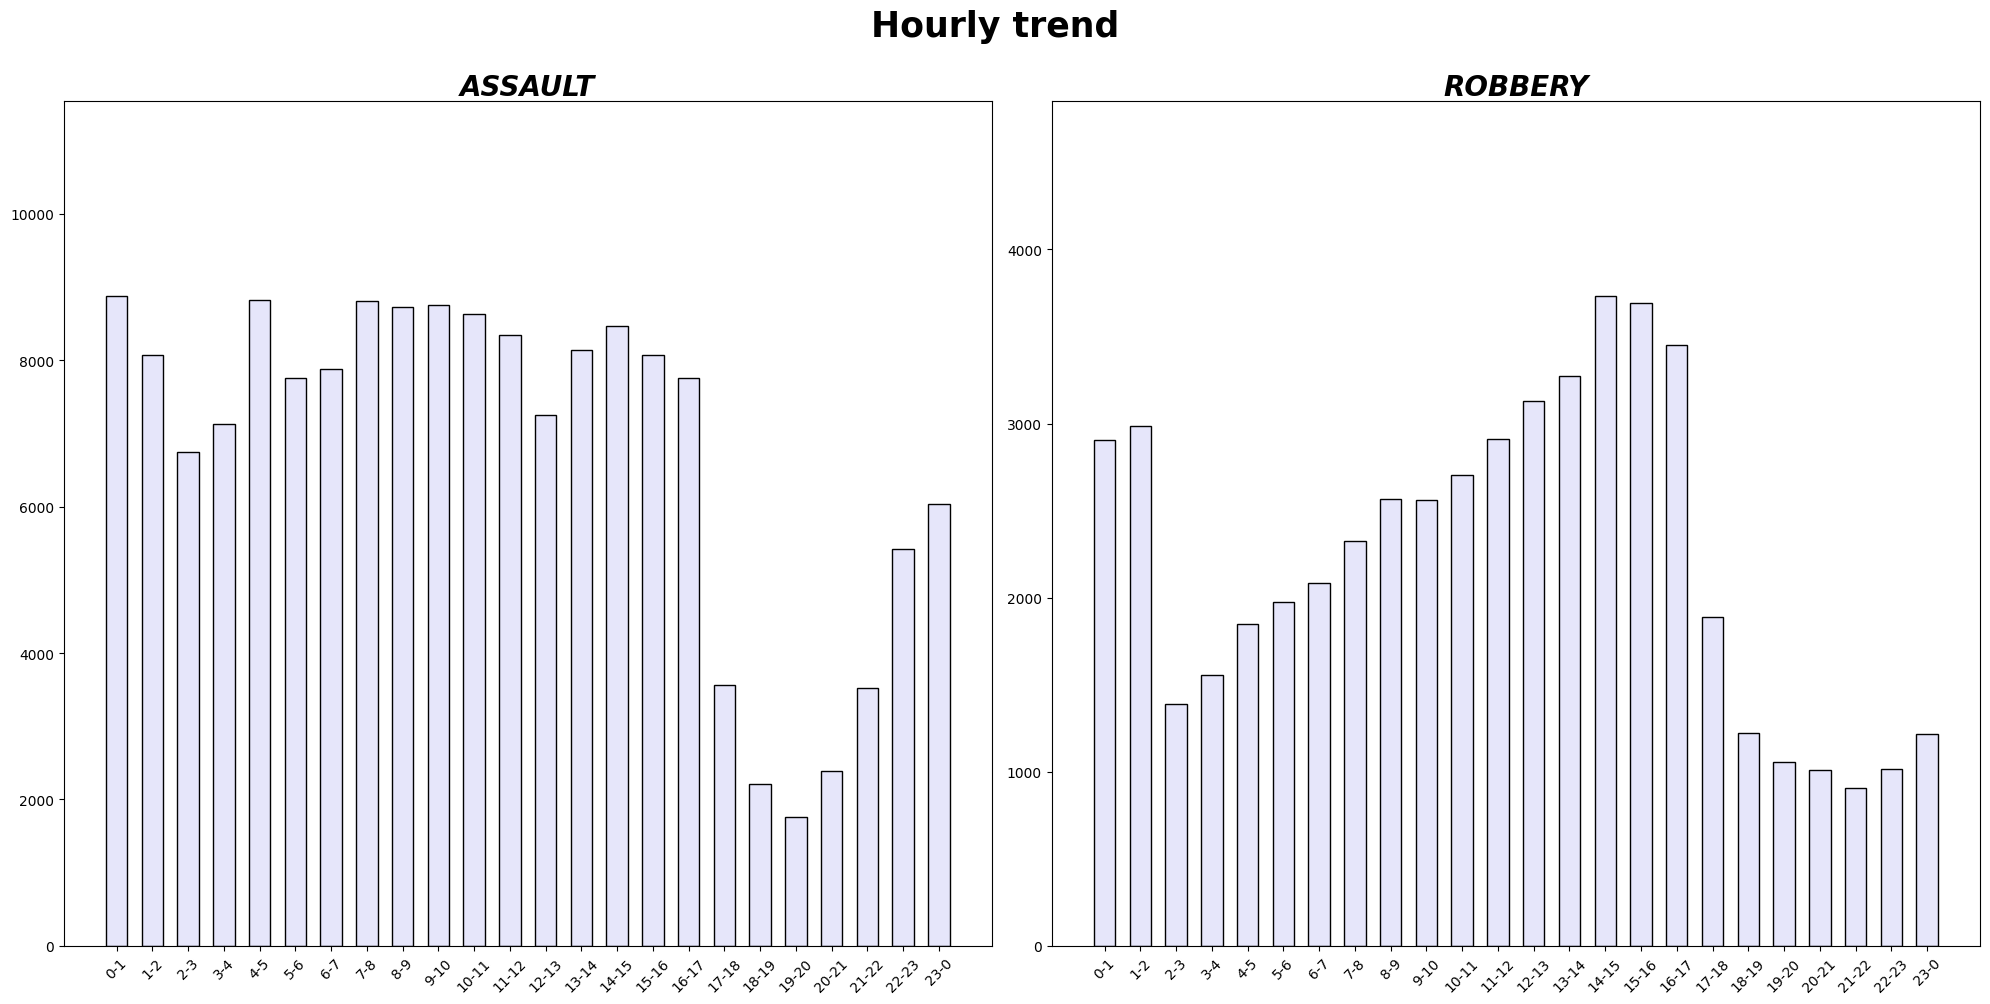

In [18]:
plt.figure(figsize=(20,10))
plt.suptitle("Hourly trend" ,fontsize=25, y=1.0, fontweight='bold', color='black')
for i in range(len(focuscrimes)):
    temp = hourly_pattern.loc[hourly_pattern['Category'] == focuscrimes[i]].reset_index(drop=True)
    x = temp["time_period"]
    y = temp["Count"]

    plt.subplot(int(len(focuscrimes)/2),2,i+1)
    plt.title(focuscrimes[i], pad=-14, fontsize = 20, fontweight='bold', fontstyle="italic")
    plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
    plt.xticks(x, hourly_slots.values(), rotation=45)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))


Yearly pattern

In [19]:
yearly_pattern = df_before_2018.groupby(by=["Year", "Category"]).size().reset_index(name="Count")

yearly_pattern = yearly_pattern.loc[yearly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

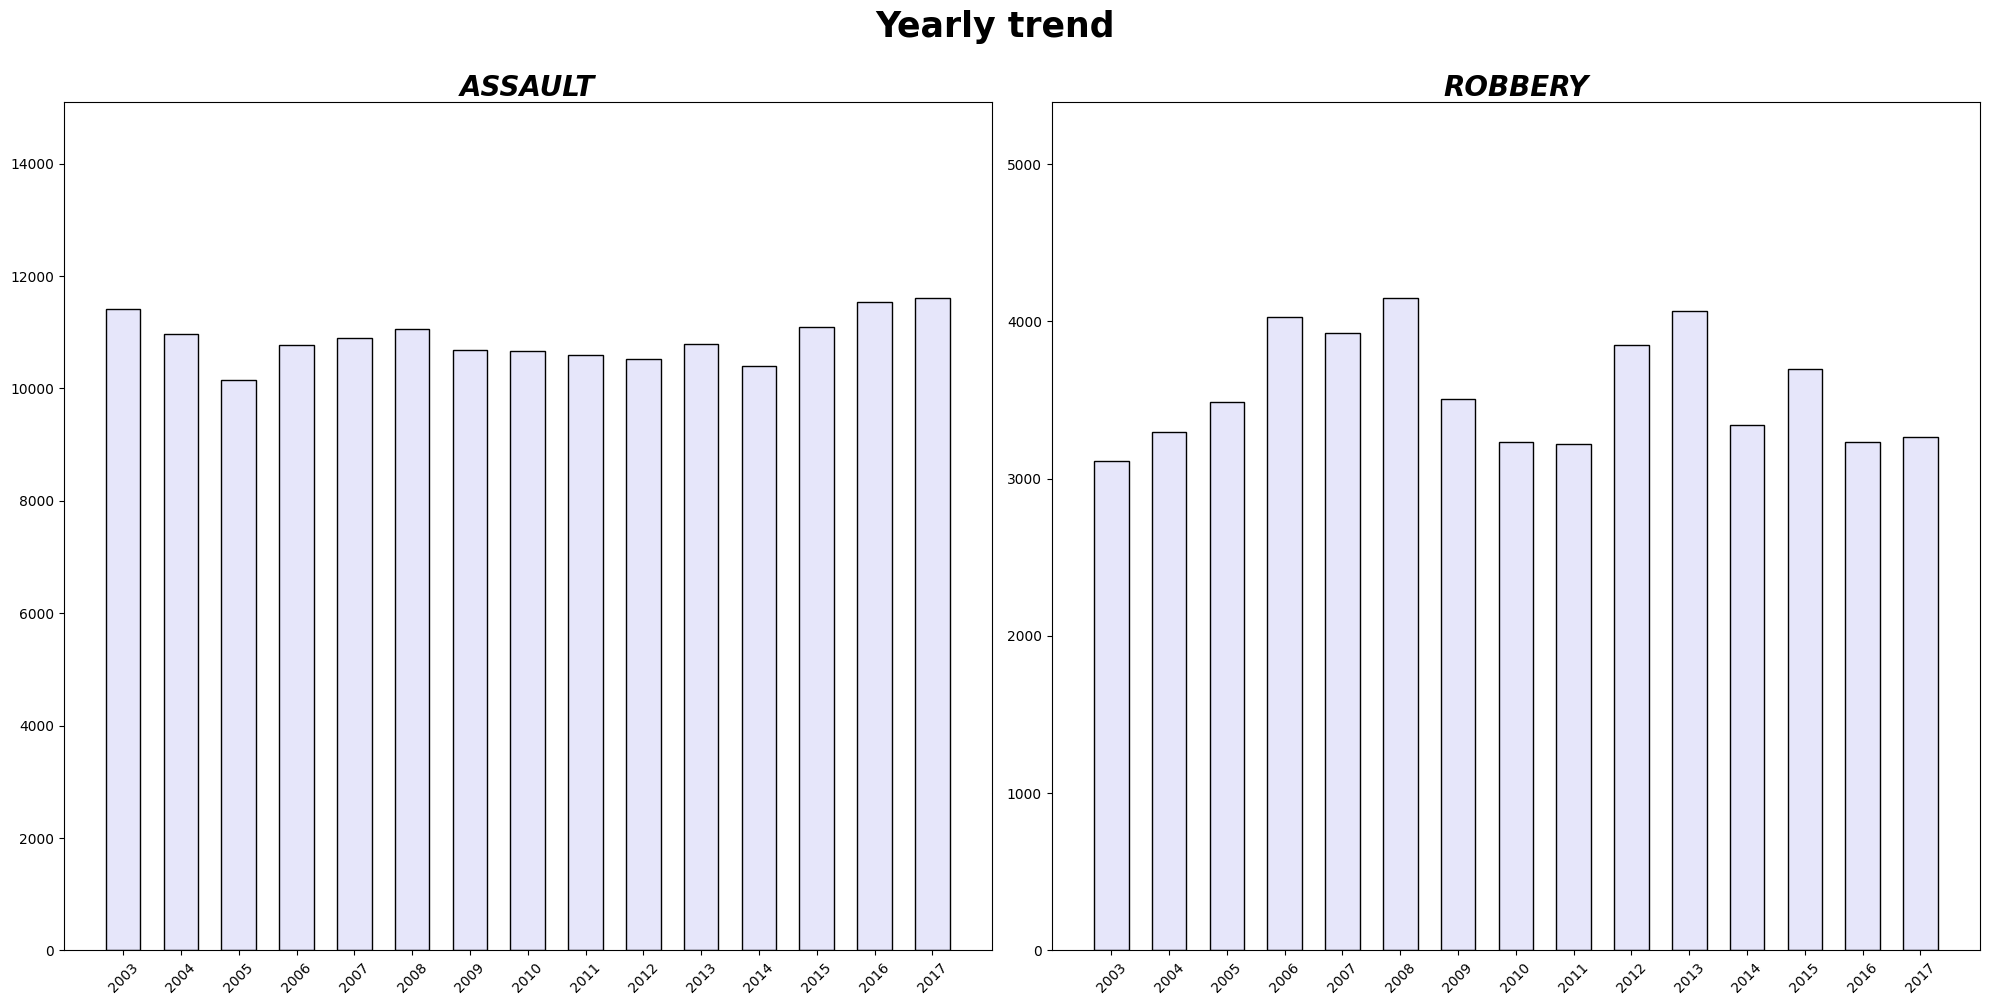

In [20]:
x_values = yearly_pattern['Year'].unique().tolist()

plt.figure(figsize=(20,10))
plt.suptitle("Yearly trend" ,fontsize=25, y=1.0, fontweight='bold', color='black')
for i in range(len(focuscrimes)):
    temp = yearly_pattern.loc[yearly_pattern['Category'] == focuscrimes[i]].reset_index(drop=True)
    x = temp["Year"]
    y = temp["Count"]

    plt.subplot(int(len(focuscrimes)/2),2,i+1)
    plt.title(focuscrimes[i], pad=-14, fontsize = 20, fontweight='bold', fontstyle="italic")
    plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
    plt.xticks(x, x_values, rotation=45)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

Robbery: significantly decreased from 2009 to 2010. The [Rand Corporation](https://www.rand.org/) studied this phenomenon on a national level in 2010, concluding that the crime prevention benefit of hiring more officers is well worth the cost. [Reference](https://countyda.sccgov.org/sites/g/files/exjcpb1121/files/10-Year%20Combined%20CA%20Crime%20Stat%20Report.pdf)

Calendar plot

In [24]:
df_robbery = df_before_2018.loc[df_before_2018['Category']=="ROBBERY"]
df_robbery = df_robbery[df_robbery["Year"] == 2012]

In [25]:
robbery_count_by_day = (
    df_robbery.groupby(df_robbery["Date"])["IncidntNum"]
    .nunique()
    .rename("Count")
)

robbery_count_by_day.index = pd.to_datetime(robbery_count_by_day.index)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


Text(0.5, -3.056018518518515, 'Week of year')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


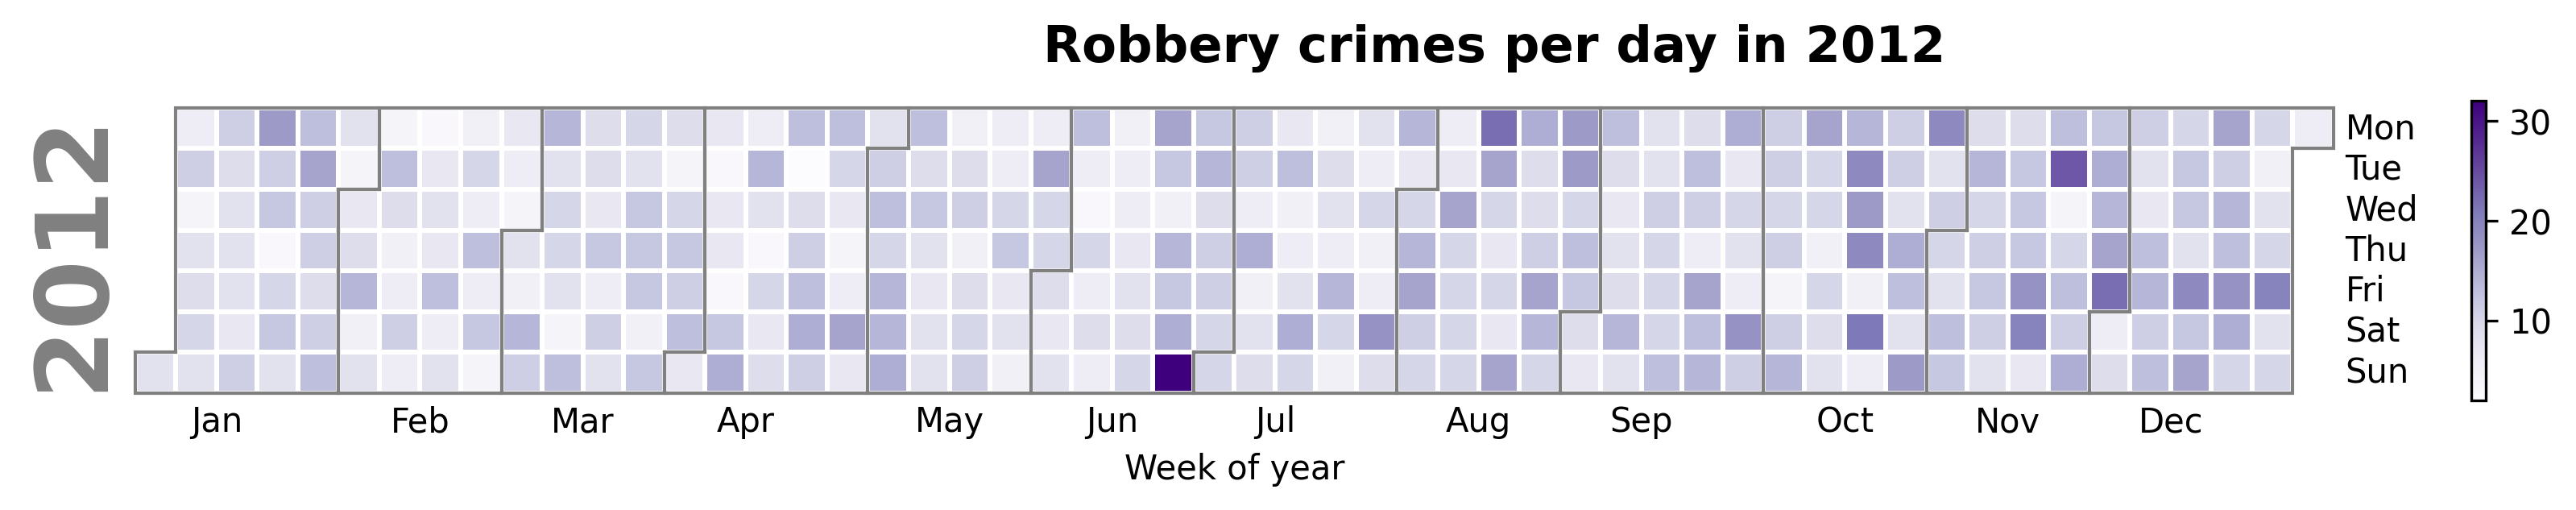

In [26]:
import calplot

fig, axs = calplot.calplot(robbery_count_by_day, cmap="Purples")
fig.set_dpi(300)

fig.suptitle("Robbery crimes per day in 2012", fontsize=15, y=1.1, fontweight='bold', color='black')
axs[0].set_xlabel("Week of year", fontsize=10)

On 24 June 2012, the San Francisco LGBT Pride Parade took place in San Francisco. The parade began at Market Street and Beale Street, then proceeded down Market Street to 8th Street. 

## Maps

In [48]:
import folium
from folium.plugins import HeatMap

In [28]:
df_before_2018

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,Hour,time_period
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,17,17-18
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,20,20-21
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,2-3
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,...,NaN,1.0,NaN,NaN,NaN,NaN,94.0,2011,5,5-6
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2010,17,17-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,2017-06-22,01:42,CENTRAL,"ARREST, CITED",...,NaN,1.0,NaN,NaN,NaN,NaN,77.0,2017,1,1-2
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,2017-09-01,17:00,PARK,NONE,...,NaN,1.0,NaN,NaN,NaN,NaN,112.0,2017,17,17-18
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,2017-06-30,17:50,BAYVIEW,"ARREST, BOOKED",...,NaN,1.0,NaN,NaN,NaN,NaN,56.0,2017,17,17-18
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,2017-12-20,15:41,SOUTHERN,"ARREST, BOOKED",...,7.0,2.0,1.0,1.0,1.0,35.0,21.0,2017,15,15-16


In [37]:
df_robbery_pride = df_robbery[df_robbery['Date'] == '2012-6-24']

In [38]:

get_XY = list(zip(list(df_robbery_pride["Y"]), list(df_robbery_pride["X"])))

SF_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles = "openstreetmap")
folium.Marker([37.77351584799628, -122.42148577465927], popup="Market Street").add_to(SF_map)
folium.Marker([37.78907067508782, -122.3929690574588], popup="Beala Street").add_to(SF_map)
folium.Marker([37.77295458293956, -122.40701151351163], popup='8th Street').add_to(SF_map)

for x,y in get_XY:
    folium.CircleMarker([x, y],
                    radius=2,
                    color='red',
                    ).add_to(SF_map)

SF_map

In [39]:
df_before_2018.head(5)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,Hour,time_period
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,17,17-18
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,20,20-21
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,2-3
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,...,NaN,1.0,NaN,NaN,NaN,NaN,94.0,2011,5,5-6
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2010,17,17-18


As Market Street is the center of SF with a high density of population during days (as shown on the viz above), we labeled the police districts (PdDistrict) and look into the occurances of robbery with a heatmap.

In [44]:
constraint = (df_before_2018['Category'] == 'ROBBERY') & (df_before_2018['Year'] >= 2011) & (df_before_2018['Year'] <= 2012) & (df_before_2018['Resolution'] == "ARREST, BOOKED")
df_robbery_heat = df_before_2018.loc[constraint].reset_index(drop=True)

In [46]:
df_robbery_heat

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,Hour,time_period
0,12042963903074,120429639,3074,ROBBERY,"ROBBERY, BODILY FORCE",Wednesday,2012-05-30,19:00,INGLESIDE,"ARREST, BOOKED",...,NaN,1.0,NaN,NaN,NaN,NaN,83.0,2012,19,19-20
1,11064404103412,110644041,3412,ROBBERY,ATTEMPTED ROBBERY ON THE STREET WITH A KNIFE,Friday,2011-08-12,08:34,MISSION,"ARREST, BOOKED",...,NaN,2.0,NaN,NaN,3.0,NaN,53.0,2011,8,8-9
2,11014174603074,110141746,3074,ROBBERY,"ROBBERY, BODILY FORCE",Wednesday,2011-02-16,17:36,NORTHERN,"ARREST, BOOKED",...,NaN,1.0,NaN,NaN,NaN,NaN,50.0,2011,17,17-18
3,11038949103014,110389491,3014,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Saturday,2011-05-14,14:50,CENTRAL,"ARREST, BOOKED",...,2.0,2.0,NaN,NaN,NaN,NaN,99.0,2011,14,14-15
4,9125291703044,91252917,3044,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Tuesday,2011-12-20,16:14,TENDERLOIN,"ARREST, BOOKED",...,5.0,2.0,1.0,1.0,NaN,NaN,19.0,2011,16,16-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,12013531903024,120135319,3024,ROBBERY,"ROBBERY OF A COMMERCIAL ESTABLISHMENT, STRONGARM",Friday,2012-02-17,15:42,BAYVIEW,"ARREST, BOOKED",...,NaN,2.0,NaN,NaN,NaN,NaN,91.0,2012,15,15-16
1218,11009049403012,110090494,3012,ROBBERY,ROBBERY ON THE STREET WITH A KNIFE,Saturday,2011-01-29,18:40,PARK,"ARREST, BOOKED",...,NaN,1.0,NaN,NaN,5.0,NaN,113.0,2011,18,18-19
1219,11068843103044,110688431,3044,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Saturday,2011-08-27,17:00,TENDERLOIN,"ARREST, BOOKED",...,5.0,2.0,1.0,1.0,NaN,NaN,19.0,2011,17,17-18
1220,11046701903014,110467019,3014,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Thursday,2011-06-09,22:21,MISSION,"ARREST, BOOKED",...,NaN,2.0,NaN,NaN,3.0,NaN,53.0,2011,22,22-23


In [47]:
x_y_robbery = list(zip(list(df_robbery_heat["Y"]), list(df_robbery_heat["X"])))

In [55]:
SF_map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 12,
                    tiles = "openstreetmap")

# List comprehension to make out list of lists

# Plot it on the map
HeatMap(x_y_robbery, min_opacity=0.35, overlay=True).add_to(SF_map)

# Display the map
SF_map